## Практическое занятие "Линейные модели. Простая регрессия".

Цель состоит в том, чтобы построить модель, которая прогнозирует продажи на основе затрат на рекламу на различных платформах, таких как телевидение, радио и газеты.

In [228]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


In [229]:
data = pd.read_csv("titanic_train.csv")
data_test = pd.read_csv("titanic_test.csv")

print("Размерность данных:", data.shape)

print("\nОсновные описательные статистики:")
print(data.describe())

print("\nТипы данных для каждого признака:")
print(data.dtypes)

Размерность данных: (891, 12)

Основные описательные статистики:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Типы данных для

### 1.Проверить данные на наличие пропущенных значений.

In [230]:
# your code here
# Проверка на наличие пропущенных значений
missing_values = data.isnull().sum()

print("Пропущенные значения в данных:")
print(missing_values[missing_values > 0])

missing_values = data_test.isnull().sum()

print("Пропущенные значения в данных test:")
print(missing_values[missing_values > 0])

Пропущенные значения в данных:
Age         177
Cabin       687
Embarked      2
dtype: int64
Пропущенные значения в данных test:
Age       86
Fare       1
Cabin    327
dtype: int64


In [231]:
# Работа с обучающей выборкой
data['Age'].fillna(data['Age'].median(), inplace=True)  # Замена медианой
data['Fare'].fillna(data['Fare'].median(), inplace=True)  # Замена медианой

# Замена пропусков в категориальных признаках
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)  # Замена модой

# Удаление столбца 'Cabin', так как слишком много пропусков
data.drop('Cabin', axis=1, inplace=True)

# Работа с тестовой выборкой
data_test['Age'].fillna(data_test['Age'].median(), inplace=True)
data_test['Fare'].fillna(data_test['Fare'].median(), inplace=True)
data_test.drop('Cabin', axis=1, inplace=True)

# Проверка на наличие оставшихся пропусков
print("Пропущенные значения в данных после обработки:")
print(data.isnull().sum())
print(data_test.isnull().sum())
data

Пропущенные значения в данных после обработки:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### 2.Проверить данные на наличие дубликатов.

In [232]:
# your code here
# Проверка на наличие дубликатов
duplicates = data.duplicated().sum()

if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов в данных.")
else:
    print("Дубликатов в данных не найдено.")

duplicates = data_test.duplicated().sum()

if duplicates > 0:
    print(f"Найдено {duplicates} дубликатов в данных.")
else:
    print("Дубликатов в данных не найдено.")

Дубликатов в данных не найдено.
Дубликатов в данных не найдено.


### 3.Проверить данные на наличие выбросов.

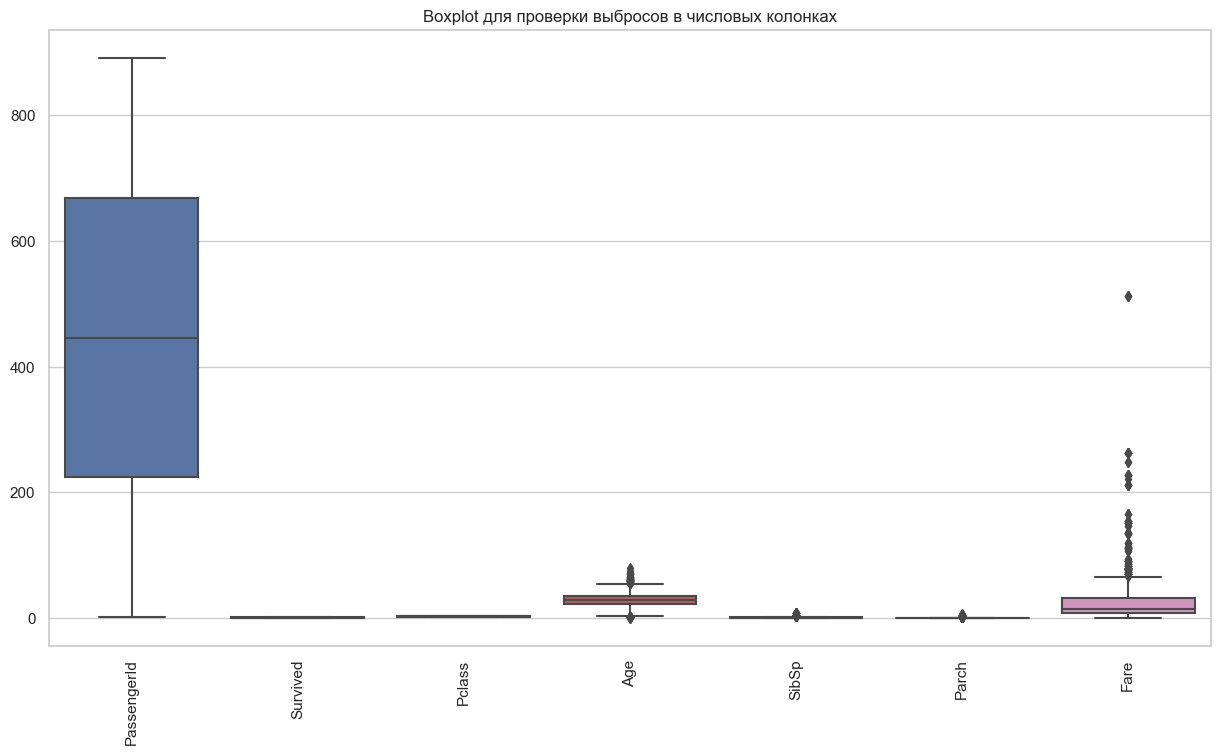

In [233]:
# your code here
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplot для проверки выбросов в числовых колонках")
plt.show()

### 4. Удалить из данных признаки: PassengerId, Name, Ticket.

In [234]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket'])
data_test = data_test.drop(columns=['PassengerId', 'Name', 'Ticket'])
data
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


### 5. На основе признаков SibSp и Parch создать категориальный признак TravelAlone, который определяет путешествовал ли человек в одиночку или нет.

In [235]:


data['TravelAlone'] = (data['SibSp'] + data['Parch'] == 0).astype(int)
data_test['TravelAlone'] = (data_test['SibSp'] + data_test['Parch'] == 0).astype(int)

print(data)
print(data_test)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0           0       3    male  22.0      1      0   7.2500        S   
1           1       1  female  38.0      1      0  71.2833        C   
2           1       3  female  26.0      0      0   7.9250        S   
3           1       1  female  35.0      1      0  53.1000        S   
4           0       3    male  35.0      0      0   8.0500        S   
..        ...     ...     ...   ...    ...    ...      ...      ...   
886         0       2    male  27.0      0      0  13.0000        S   
887         1       1  female  19.0      0      0  30.0000        S   
888         0       3  female  28.0      1      2  23.4500        S   
889         1       1    male  26.0      0      0  30.0000        C   
890         0       3    male  32.0      0      0   7.7500        Q   

     TravelAlone  
0              0  
1              0  
2              1  
3              0  
4              1  
..           ...  
886           

### 6. Используя функцию value_counts(), посчитать количество человек каждого пола. С помощью countplot из seaborn визуализировать эти данные.

male      577
female    314
Name: Sex, dtype: int64


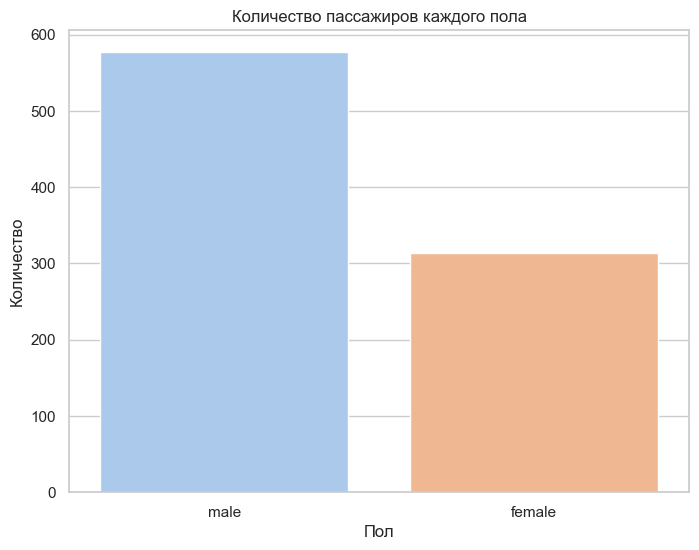

In [236]:

# Подсчитываем количество человек каждого пола
gender_counts = data['Sex'].value_counts()
print(gender_counts)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, palette='pastel')
plt.title('Количество пассажиров каждого пола')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

### 7. С помощью barplot из seaborn визуализировать влияние признака пол на выживаемость пассажиров. Построить гистограмму количества погибших и выживших пассажиров среди мужчин и женщин (использовать countplot из seaborn).

C:\Users\Egor\AppData\Local\Temp\ipykernel_19620\2513340525.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, ci=None, palette='pastel')


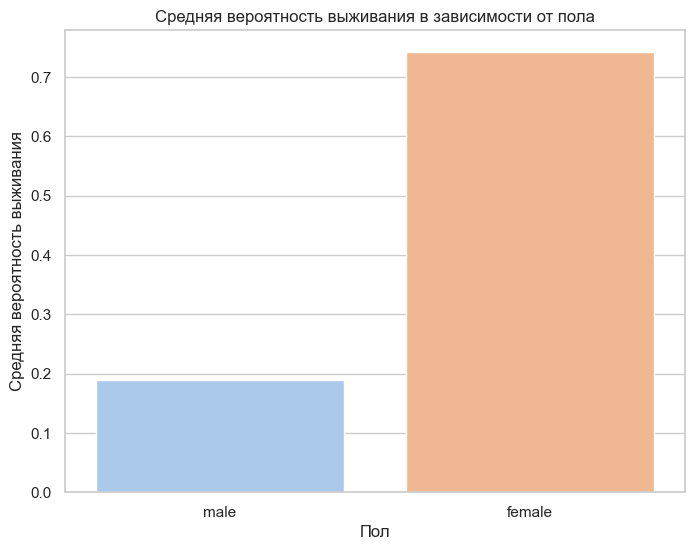

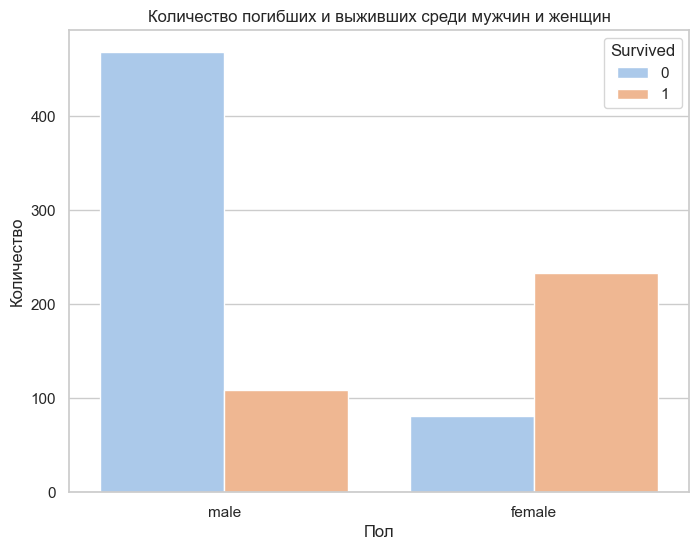

In [237]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data, ci=None, palette='pastel')

plt.title('Средняя вероятность выживания в зависимости от пола')
plt.xlabel('Пол')
plt.ylabel('Средняя вероятность выживания')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=data, palette='pastel')

plt.title('Количество погибших и выживших среди мужчин и женщин')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

### 8. Посчитать количество пассажиров в зависимости от признака Pclass. Построить гистограмму по этим данным (countplot).

3    491
1    216
2    184
Name: Pclass, dtype: int64


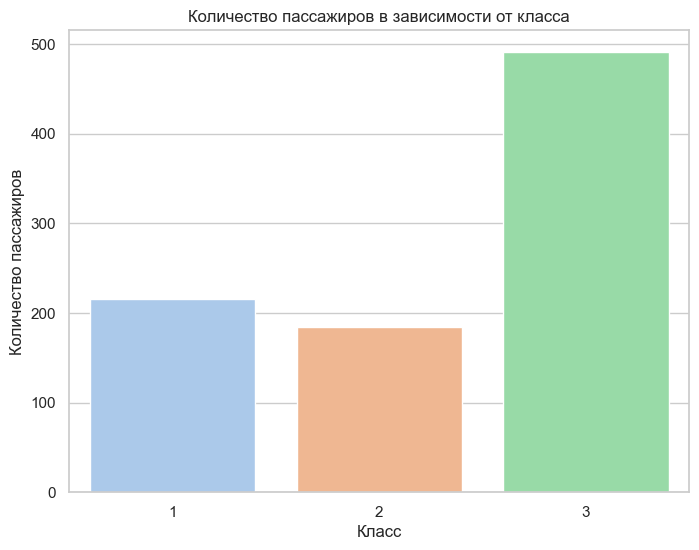

In [238]:
pclass_counts = data['Pclass'].value_counts()
print(pclass_counts)

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=data, palette='pastel')

plt.title('Количество пассажиров в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.show()

### 9. Исследовать влияние признака Pclass на выживаемость, визуализировать данные на основе barplot. Построить гистограмму количества погибших и выживших пассажиров, сгруппировав данные по признаку Pclass (использовать countplot из seaborn).

C:\Users\Egor\AppData\Local\Temp\ipykernel_19620\3687945992.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, ci=None, palette='pastel')


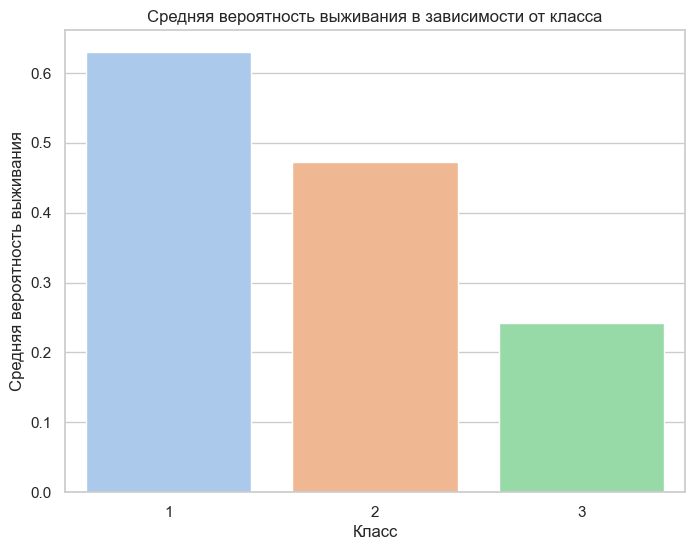

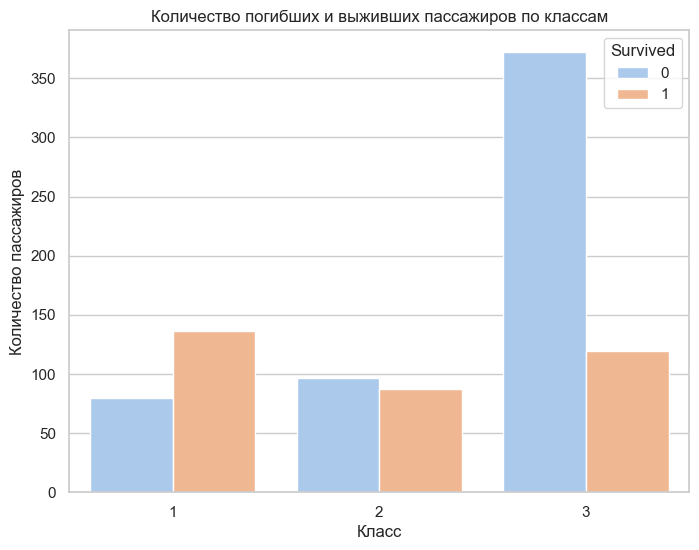

In [239]:
sns.set(style="whitegrid")

# Создаем barplot для визуализации влияния класса на выживаемость
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data, ci=None, palette='pastel')

# Добавляем заголовок и метки осей
plt.title('Средняя вероятность выживания в зависимости от класса')
plt.xlabel('Класс')
plt.ylabel('Средняя вероятность выживания')

# Показываем график
plt.show()

# Создаем countplot для визуализации количества погибших и выживших пассажиров по классам
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=data, palette='pastel')

# Добавляем заголовок и метки осей
plt.title('Количество погибших и выживших пассажиров по классам')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')

# Показываем график
plt.show()

### 10.  Исследовать выживаемость пассажиров в зависимости от возраста.

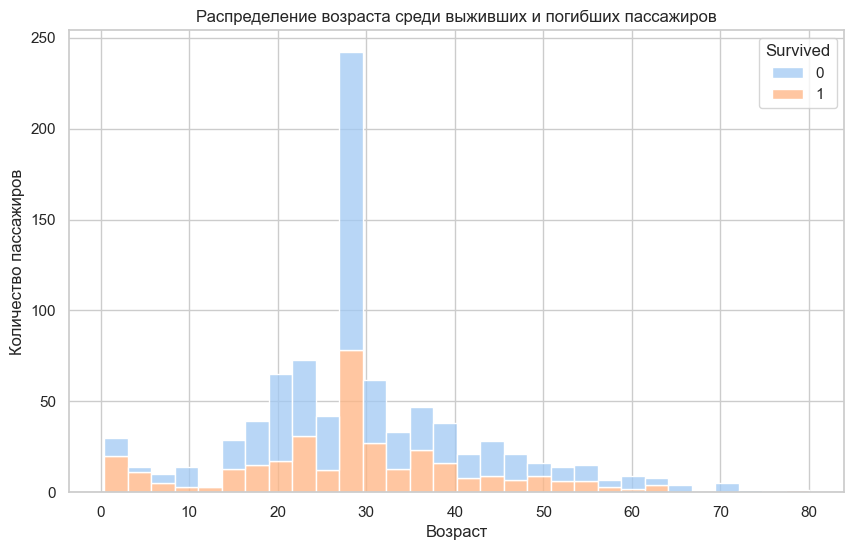

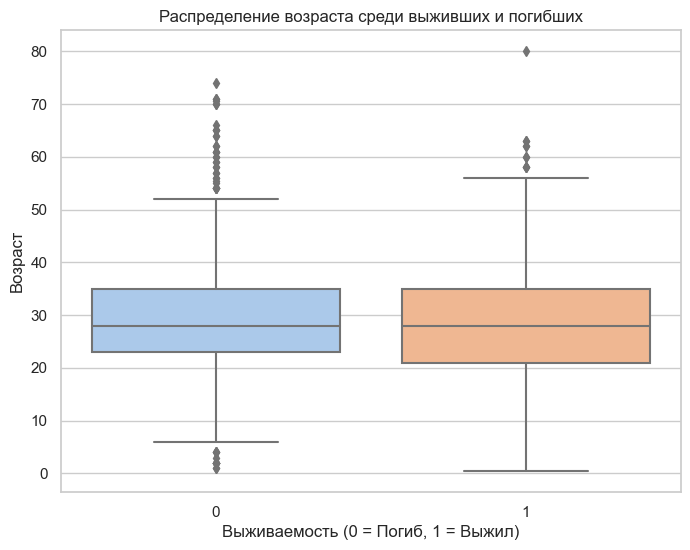

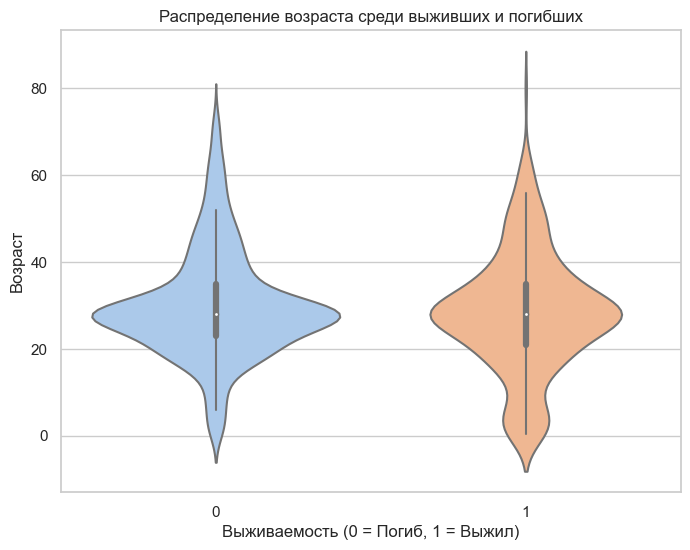

In [240]:
sns.set(style="whitegrid")

# Создаем histplot для визуализации распределения возраста среди выживших и погибших
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=30, palette='pastel')

# Добавляем заголовок и метки осей
plt.title('Распределение возраста среди выживших и погибших пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=data, palette='pastel')

# Добавляем заголовок и метки осей
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Выживаемость (0 = Погиб, 1 = Выжил)')
plt.ylabel('Возраст')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Age', data=data, palette='pastel', split=True)

# Добавляем заголовок и метки осей
plt.title('Распределение возраста среди выживших и погибших')
plt.xlabel('Выживаемость (0 = Погиб, 1 = Выжил)')
plt.ylabel('Возраст')

# Показываем график
plt.show()


### 11. Построить lmplot из библиотеки seaborn, указав следующие аргумены (x='Age', y='Survived'). Сделать вывод по полученной визуализации.

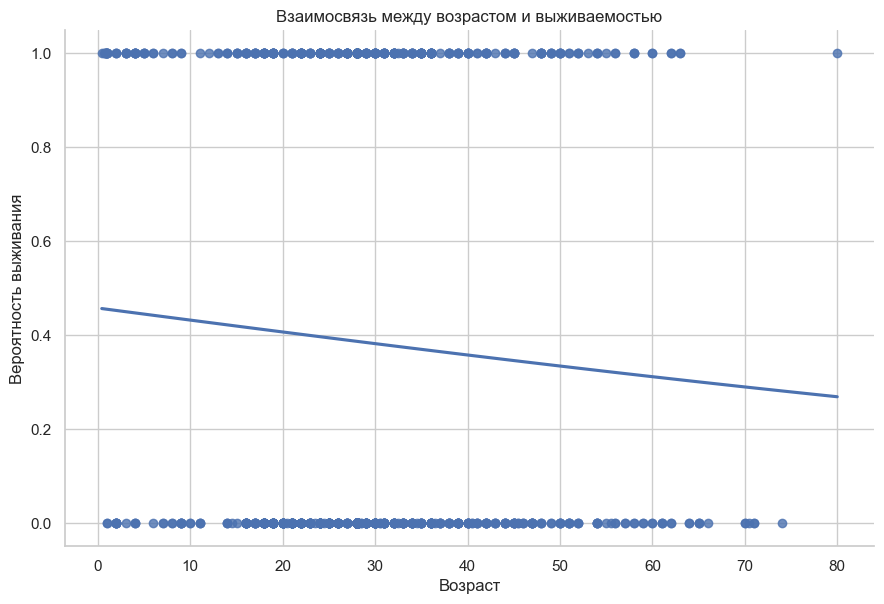

In [241]:
sns.set(style="whitegrid")

# Создаем lmplot для визуализации взаимосвязи между возрастом и выживаемостью
sns.lmplot(x='Age', y='Survived', data=data, logistic=True, ci=None, palette='pastel', height=6, aspect=1.5)

# Добавляем заголовок и метки осей
plt.title('Взаимосвязь между возрастом и выживаемостью')
plt.xlabel('Возраст')
plt.ylabel('Вероятность выживания')
plt.show()


# 12.	Вывести количество пассажиров по признаку «Emabarked», визуализировать с помощью countplot.

Количество пассажиров по признаку 'Embarked':
S    646
C    168
Q     77
Name: Embarked, dtype: int64


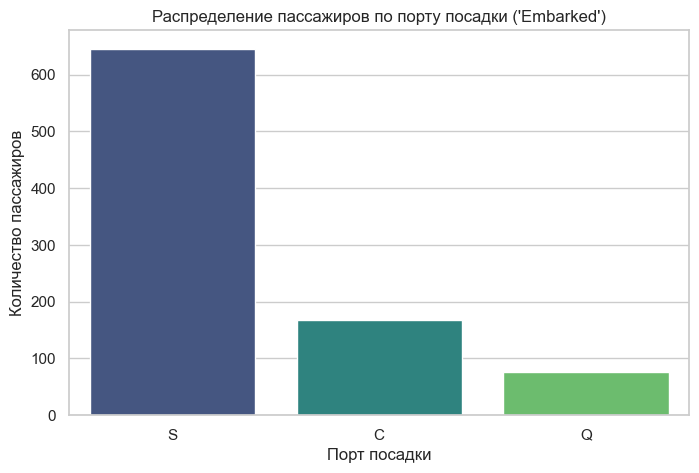

In [242]:
embarked_counts = data['Embarked'].value_counts()
print("Количество пассажиров по признаку 'Embarked':")
print(embarked_counts)

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Embarked', palette='viridis')
plt.title("Распределение пассажиров по порту посадки ('Embarked')")
plt.xlabel("Порт посадки")
plt.ylabel("Количество пассажиров")
plt.show()


# 13.	Исследовать влияние признака «Embarked» на выживаемость, визуализировать с помощью barplot. Построить гистограмму количества погибших и выживших пассажиров, сгруппировав данные по признаку «Embarked» (использовать countplot из seaborn).

C:\Users\Egor\AppData\Local\Temp\ipykernel_19620\1635254226.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Embarked', y='Survived', palette='viridis', ci=None)


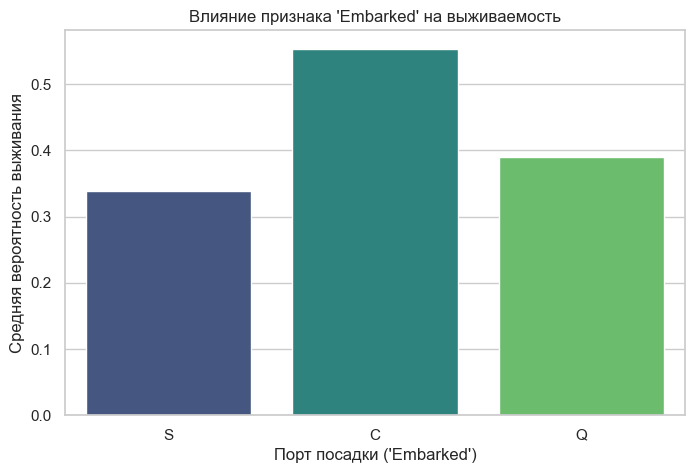

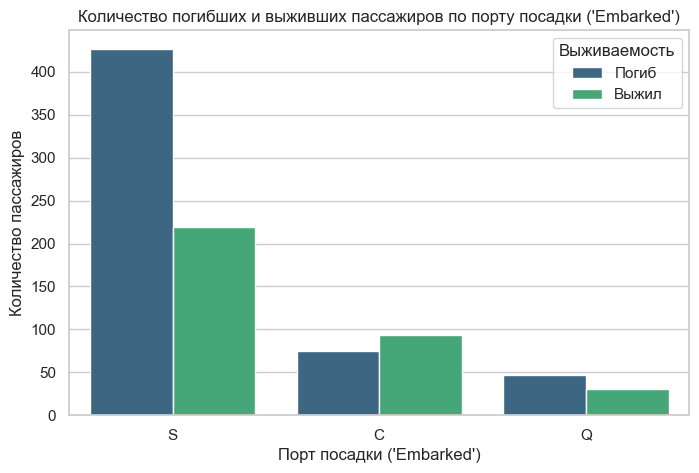

In [243]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Embarked', y='Survived', palette='viridis', ci=None)
plt.title("Влияние признака 'Embarked' на выживаемость")
plt.xlabel("Порт посадки ('Embarked')")
plt.ylabel("Средняя вероятность выживания")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Embarked', hue='Survived', palette='viridis')
plt.title("Количество погибших и выживших пассажиров по порту посадки ('Embarked')")
plt.xlabel("Порт посадки ('Embarked')")
plt.ylabel("Количество пассажиров")
plt.legend(title='Выживаемость', loc='upper right', labels=['Погиб', 'Выжил'])
plt.show()


# 14. Количество пассажиров на основе признака «TravelAlone»


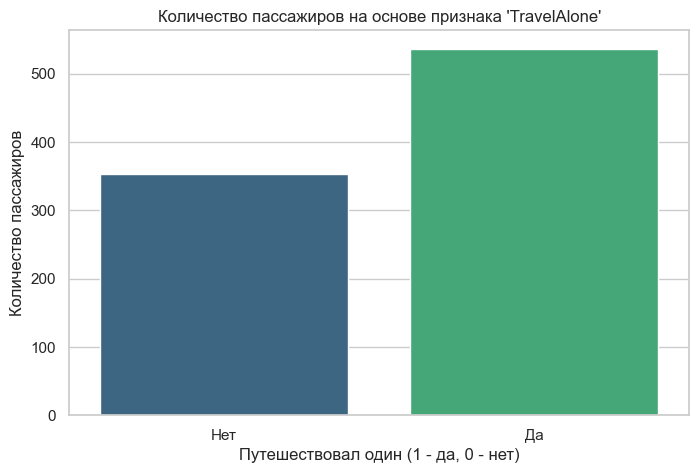

In [244]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='TravelAlone', palette='viridis')
plt.title("Количество пассажиров на основе признака 'TravelAlone'")
plt.xlabel("Путешествовал один (1 - да, 0 - нет)")
plt.ylabel("Количество пассажиров")
plt.xticks([0, 1], labels=['Нет', 'Да'])
plt.show()


15.	Исследовать влияние признака «TravelAlone» на выживаемость, визуализировать с помощью с помощью barplot.

C:\Users\Egor\AppData\Local\Temp\ipykernel_19620\3187178391.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='TravelAlone', y='Survived', palette='viridis', ci=None)


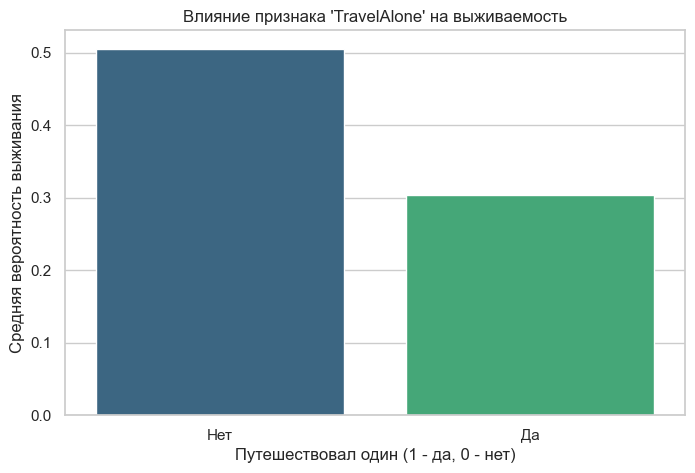

In [245]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='TravelAlone', y='Survived', palette='viridis', ci=None)
plt.title("Влияние признака 'TravelAlone' на выживаемость")
plt.xlabel("Путешествовал один (1 - да, 0 - нет)")
plt.ylabel("Средняя вероятность выживания")
plt.xticks([0, 1], labels=['Нет', 'Да'])
plt.show()

# 16.	По данным построить матрицу корреляций. Сделать выводы на основании полученных значений.

C:\Users\Egor\AppData\Local\Temp\ipykernel_19620\856563987.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


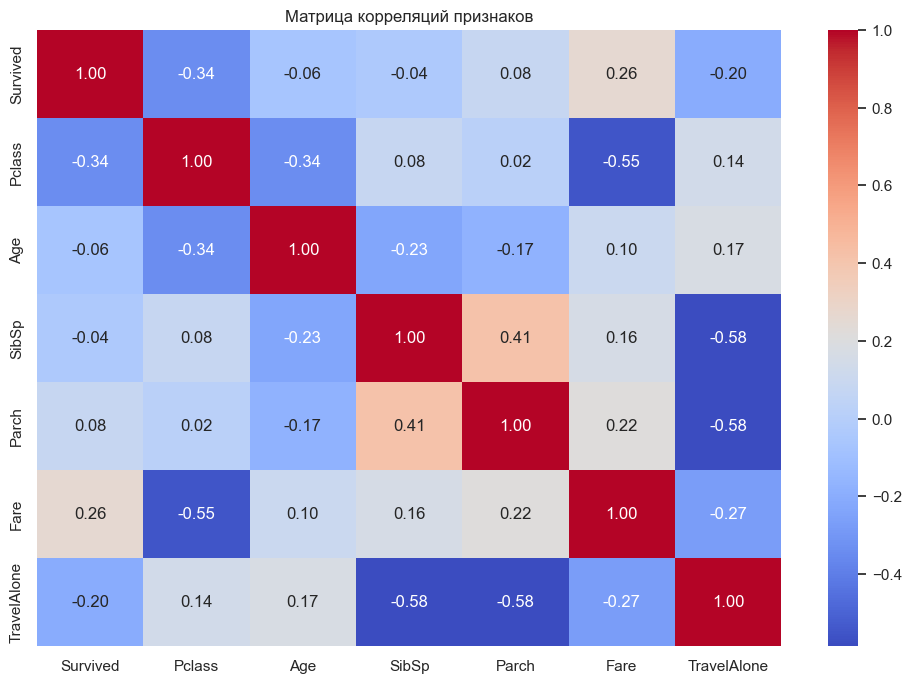

In [246]:
corr_matrix = data.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Матрица корреляций признаков")
plt.show()


# 17.	Для категориальных признаков «Sex» и «Embarked» выполнить Label-кодирование.


In [247]:
label_encoder = LabelEncoder()

data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

data_test['Sex'] = label_encoder.fit_transform(data_test['Sex'])
data_test['Embarked'] = label_encoder.fit_transform(data_test['Embarked'])

print(data[['Sex', 'Embarked']].head())
data

   Sex  Embarked
0    1         2
1    0         0
2    0         2
3    0         2
4    1         2


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,28.0,1,2,23.4500,2,0
889,1,1,1,26.0,0,0,30.0000,0,1


# 18.	Разделить данные на обучающую и тестовую выборки.

In [248]:
X = data.drop(columns=['Survived'])
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Обучающая выборка:", X_train.shape, y_train.shape)
print("Тестовая выборка:", X_test.shape, y_test.shape)
data

Обучающая выборка: (712, 8) (712,)
Тестовая выборка: (179, 8) (179,)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,TravelAlone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,28.0,1,2,23.4500,2,0
889,1,1,1,26.0,0,0,30.0000,0,1


# 19.	Построить различные модели для прогноза выживаемости пассажира (не менее 3 моделей). Выбрать метрику и сравнить по ней построенные модели.


In [249]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

model_results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)  
    predictions = model.predict(X_test_scaled) 
    
    accuracy = accuracy_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    model_results[model_name] = {"Accuracy": accuracy, "MAE": mae}
    
    print(f"{model_name}:")
    print(f"  Точность (Accuracy) = {accuracy:.2f}")
    print(f"  Средняя абсолютная ошибка (MAE) = {mae:.2f}")


Logistic Regression:
  Точность (Accuracy) = 0.79
  Средняя абсолютная ошибка (MAE) = 0.21
Random Forest:
  Точность (Accuracy) = 0.82
  Средняя абсолютная ошибка (MAE) = 0.18
K-Nearest Neighbors:
  Точность (Accuracy) = 0.82
  Средняя абсолютная ошибка (MAE) = 0.18


# 20.	Для каждой модели построить матрицу ошибок (confusion_matrix) и classification_report по тестовой выборке.


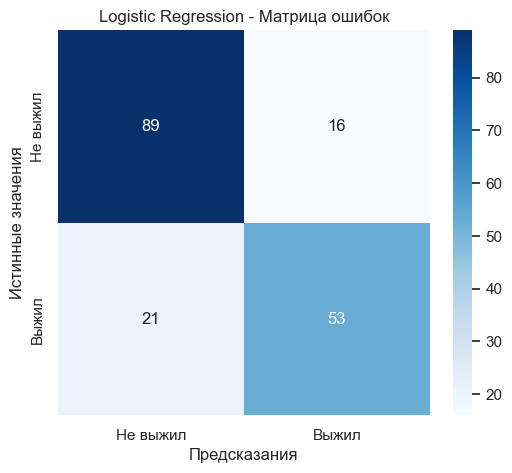

Logistic Regression:

Отчёт классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

--------------------------------------------------


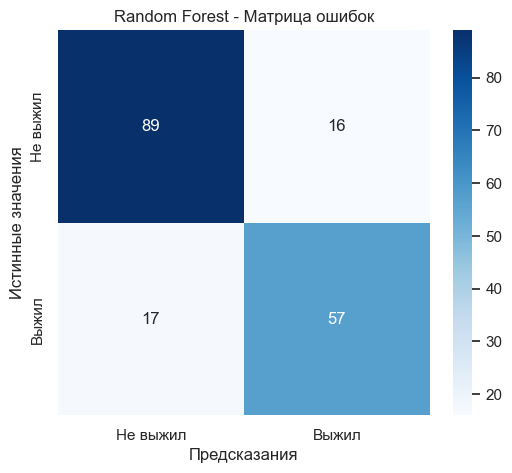

Random Forest:

Отчёт классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

--------------------------------------------------


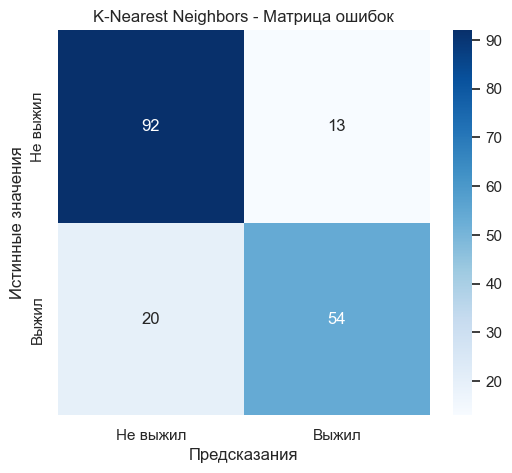

K-Nearest Neighbors:

Отчёт классификации (Classification Report):
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

--------------------------------------------------


In [250]:


for model_name, model in models.items():
    predictions = model.predict(X_test_scaled)
    
    conf_matrix = confusion_matrix(y_test, predictions)
    
    class_report = classification_report(y_test, predictions)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Не выжил', 'Выжил'], yticklabels=['Не выжил', 'Выжил'])
    plt.title(f"{model_name} - Матрица ошибок")
    plt.xlabel("Предсказания")
    plt.ylabel("Истинные значения")
    plt.show()
    
    print(f"{model_name}:")
    print("\nОтчёт классификации (Classification Report):")
    print(class_report)
    print("-" * 50)


# 21.	Для лучшей модели подобрать оптимальные значения параметров с помощью поиска по сетке (GridSearchCV).


In [251]:
best_model_name = max(model_results, key=lambda x: model_results[x]["Accuracy"])
best_model = models[best_model_name]

param_grid = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10], "solver": ["lbfgs", "liblinear"]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 20]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
}

grid_search = GridSearchCV(
    estimator=best_model, 
    param_grid=param_grid[best_model_name], 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

optimal_model = grid_search.best_estimator_
print(f"Лучшая модель: {best_model_name}")
print("Оптимальные параметры:", grid_search.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Лучшая модель: Random Forest
Оптимальные параметры: {'max_depth': 5, 'n_estimators': 200}


# 22.	На основе лучшей модели с оптимальными параметрами сделать прогнозы на новых данных (файл test.csv).

In [252]:
test_features_scaled = scaler.transform(data_test)
predictions_test = optimal_model.predict(data_test)
print(predictions_test)
data_test_pred = data_test
data_test_pred['Survived'] = predictions_test
print(data_test_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 1 0 1 0 0 0]
     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  TravelAlone  \
0         3    1  34.5      0      0    7.8292         1            1   
1    

C:\Users\Egor\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
